In [8]:
from utils.data import get_dataloaders  # 你需要在 `dataset.py` 中定义 CustomDataset
from utils.tools import save_img
data_path = 'C:/EEE5046 Signal/PR2/ecg'
BS = 64
train_loader, val_loader = get_dataloaders(data_path, cv=0, batch_size=BS)

torch.Size([1, 3000])
[[-0.315629   -0.45879614 -0.5303797  ... -0.43323058 -0.40255192
  -0.28495035]]


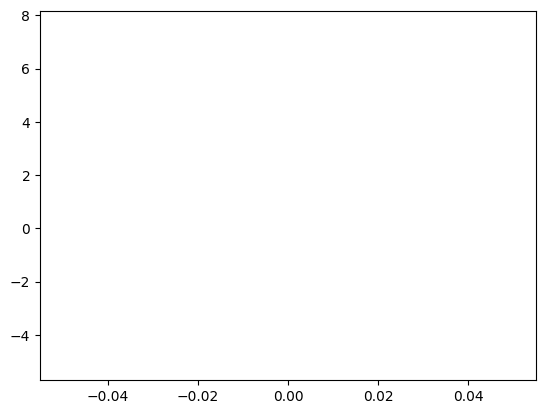

In [21]:
import matplotlib.pyplot as plt
import time
import numpy as np
for data in train_loader:
    ecg = data[0][0]
    print(ecg.shape)
    ecg = ecg.cpu().numpy()
    print(ecg)
    plt.plot(ecg)
    plt.show()
    break


In [24]:
ecg.shape

(1, 3000)

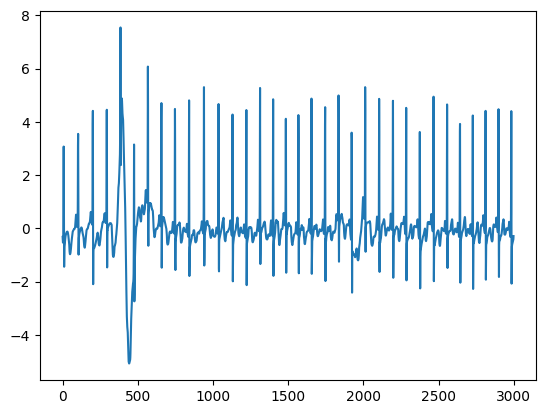

In [25]:
plt.plot(ecg[0])

(19, 2501)


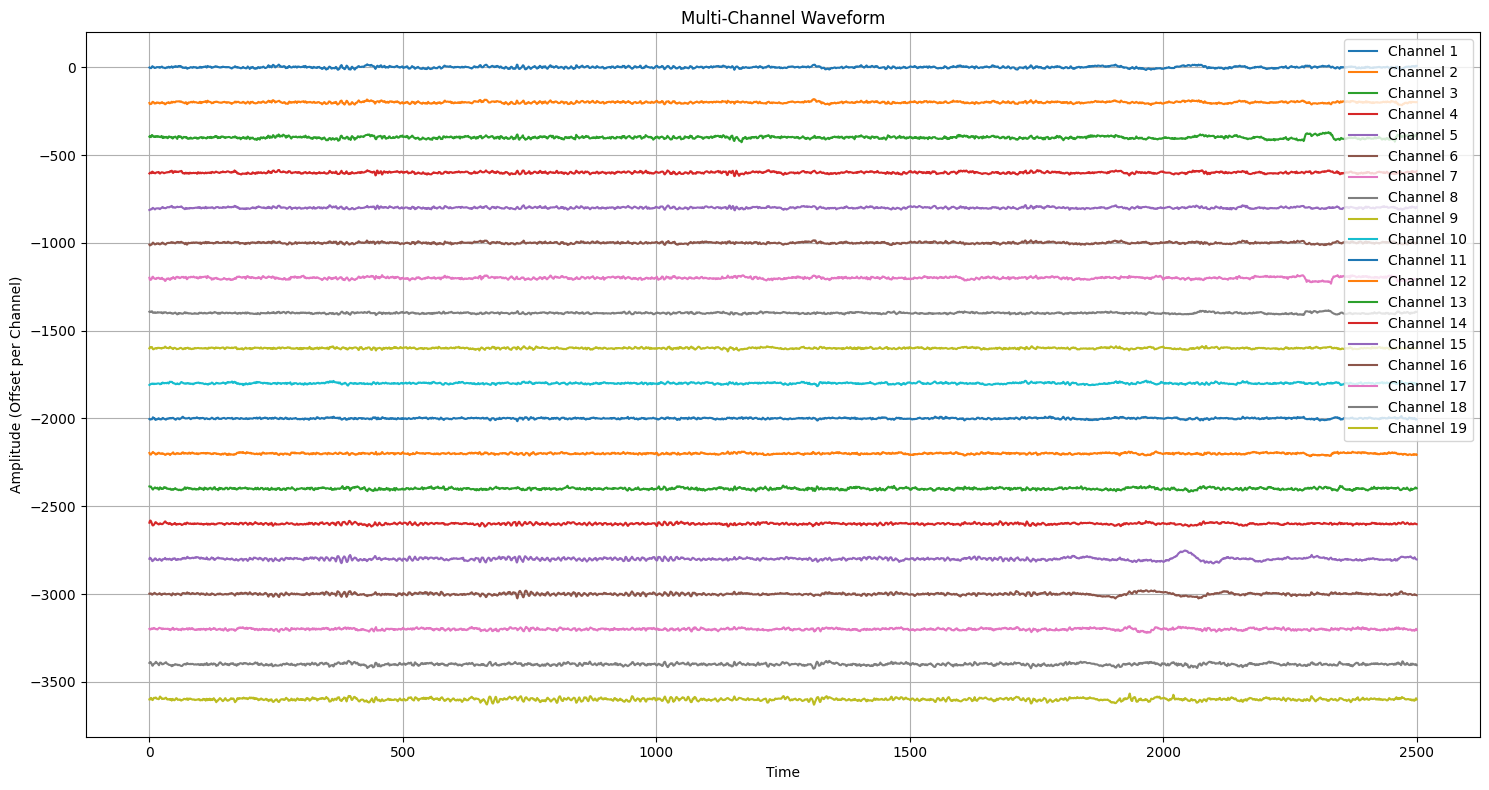

In [91]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# 指定.mat文件路径
[sub, run] = ['03', 3]
file_path = f'Z:\qingzhu\EEG_raw\BCMI_MIDAS_tmp\sub_{sub}_run_{run}.mat'

# 读取.mat文件
mat_data = scipy.io.loadmat(file_path)

# 假设数据存储在.mat文件的键为 'data'
data = mat_data['data_ica']['trial']  # 修改键名为实际数据键名
data = data[0][0][0][0]
# data = data[:, 10000:20000]
print(data.shape)

# 检查数据形状是否为 [C, T]
if len(data.shape) != 2:
    raise ValueError("数据不是 [C, T] 的矩阵，请检查文件内容")

# 获取通道数 C 和时间点数 T
C, T = data.shape

# 绘制多通道波形图
plt.figure(figsize=(15, 8))
for i in range(C):
    plt.plot(data[i, :] + i * -200, label=f"Channel {i+1}")  # 偏移绘图以避免重叠

plt.title("Multi-Channel Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude (Offset per Channel)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
data

array([[array([[array([[ 4.6416125e+00, -2.8191366e+01, -2.7589691e+01, ...,
                         6.3239012e+00,  8.8479662e+00,  6.1339700e-01],
                       [ 3.9561195e+00, -2.3251616e+01, -2.2747118e+01, ...,
                         5.5602889e+00,  7.7826061e+00,  5.2401316e-01],
                       [ 3.1581821e+00,  1.8557281e+01,  1.8960320e+01, ...,
                        -2.8184311e+00, -3.9736054e+00, -1.1706814e-01],
                       ...,
                       [-3.0525866e+00,  5.6511312e+00,  7.7030454e+00, ...,
                        -3.1698346e-01, -3.4263587e-01, -3.3427867e-01],
                       [ 2.6110053e-02,  2.2941995e+00,  7.3460770e-01, ...,
                         1.6493891e+00,  2.0500445e+00,  6.9639266e-01],
                       [-1.6303159e+00,  4.3098211e-01, -3.2807946e-01, ...,
                         1.8856260e+00,  2.3861668e+00,  6.7217922e-01]], dtype=float32)]],
              dtype=object)                          

(19, 71750)

In [ ]:
data